Running test case 0 with input '[1,0,0,1,1]'...
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0] [0, 0, 0, 0, 0, 1, 0, 0]


ValueError: operands could not be broadcast together with shapes (32,) (8,) 

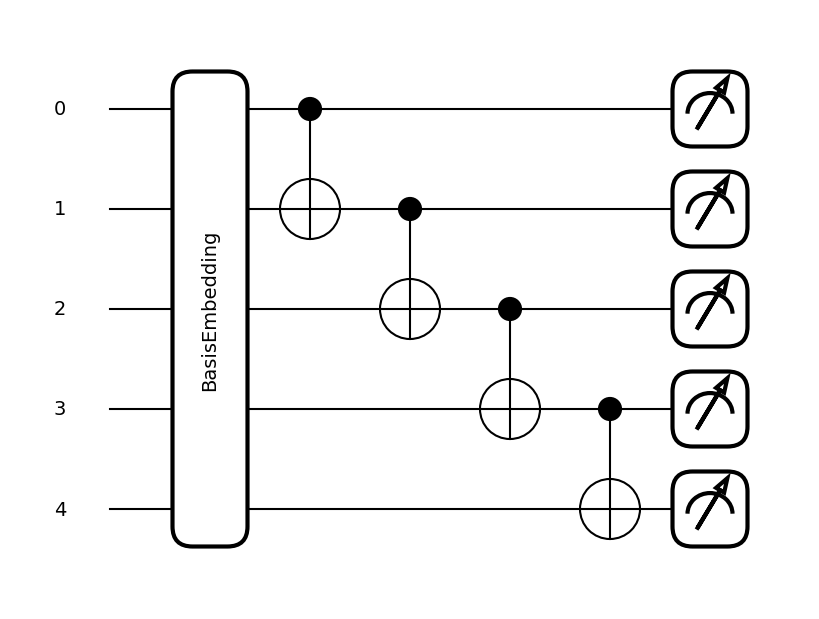

In [9]:
import json
import pennylane as qml
import pennylane.numpy as np

def binary_to_grey(num_wires):
    for wire in range(num_wires-1):
        qml.CNOT(wires=[wire, wire+1])

def run(test_case_input: str) -> str:
    binary_string = json.loads(test_case_input)
    n_wires = int(len(binary_string))

    dev = qml.device("default.qubit", wires = n_wires)

    @qml.qnode(dev)
    def circuit():
        qml.BasisEmbedding(binary_string, range(n_wires))
        binary_to_grey(n_wires)
        return qml.probs()
    qml.draw_mpl(circuit)()
    output = circuit().tolist()
    
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    print (solution_output,expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)


# These are the public test cases
test_cases = [
    # ('[0,1,0]', '[0, 0, 0, 1, 0, 0, 0, 0]'),
    # ('[1,1,1]', '[0, 0, 0, 0, 0, 1, 0, 0]'),
    ('[1,0,0,1,1]', '[0, 0, 0, 0, 0, 1, 0, 0]')
]

def convert_greycode(self, n):
      if n == 0:
         return 0
      x = 1
      while x * 2 <= n:
         x *= 2
      return x + self.solve(2 * x - n - 1)

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:

        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")